<a href="https://colab.research.google.com/github/lakshmikanthreddybanapuram/QML-Lab/blob/main/QML_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 8: Grover’s Algorithm for a 3-Qubit Database**

### **Aim**
To implement **Grover’s quantum search algorithm** for a 3-qubit search space (8 items) using **Cirq**, and demonstrate that the marked item (target state) can be found with high probability after the optimal number of iterations.

### **1. Mathematical Model of Grover’s Algorithm for a 3-Qubit Database**

**Database size:**  
Search space \( N = 2^3 = 8 \) elements represented by 3-qubit basis states  
\( \{\,$|000\rangle, |001\rangle, \dots, |111\rangle\,$\} \).

**Target:**  
A basis state \( $|w\rangle$ \), here chosen as \( $|101\rangle$\).

**Initial State:**  
Equal superposition \( |S\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle = \frac{1}{\sqrt{8}} \sum_{x=0}^{7} $|x\rangle$ \),  
created by applying Hadamard gates on all 3 qubits.

**Oracle:**  
\( f(x) = 1 \) if \( x = x' \) (the *marked* target), and \( 0 \) otherwise.

**Diffusion Operator:**  
Inversion about the mean, realized by Hadamard gates, X gates, multi-controlled Z, and reversing these gates.

**Grover Operator:**  
\( G = D \cdot O \)

**Grover Iterations:**  
Apply the oracle and diffusion operator approximately  
\( r = $\frac{\pi}{4}\sqrt{\frac{N}{M}}$ \) times to amplify the amplitude of the marked state.  
For \( N = 8 \) and \( M = 1 \), \( r = 2 \).

**Measurement:**  
Measurement of all qubits follows the iterations, producing bit strings with probability concentrated on the marked state.

### **2. Algorithm – Grover’s Algorithm for a 3-Qubit Database**

1. Initialize 3 qubits to \($ |000\rangle $\).  
2. Create a uniform superposition by applying Hadamard gates \( H^${\otimes 3}$ \).  
3. Repeat \( k = 2 \) times:  
   - Apply the **oracle**, marking the target bit string with a phase flip on the marked state.  
   - Apply the **diffusion operator** (inversion about the mean).  
4. Measure all qubits to obtain results peaked at the target state with high probability.


Circuit diagram:
(0, 0): ───H───────@───H───X───────────@───X───H───────────@───H───X───────────@───X───H───────M('result')───
                   │                   │                   │                   │               │
(0, 1): ───H───X───@───X───H───X───────@───X───H───X───────@───X───H───X───────@───X───H───────M─────────────
                   │                   │                   │                   │               │
(0, 2): ───H───H───X───H───H───X───H───X───H───X───H───H───X───H───H───X───H───X───H───X───H───M─────────────
Measurement results for target |101>:
State |000>: 13 times (1.30%) 
State |001>: 9 times (0.90%) 
State |010>: 10 times (1.00%) 
State |011>: 8 times (0.80%) 
State |100>: 4 times (0.40%) 
State |101>: 941 times (94.10%) <-- Target
State |110>: 8 times (0.80%) 
State |111>: 7 times (0.70%) 

Success rate: 94.10% (optimal ~94% after 2 iterations)


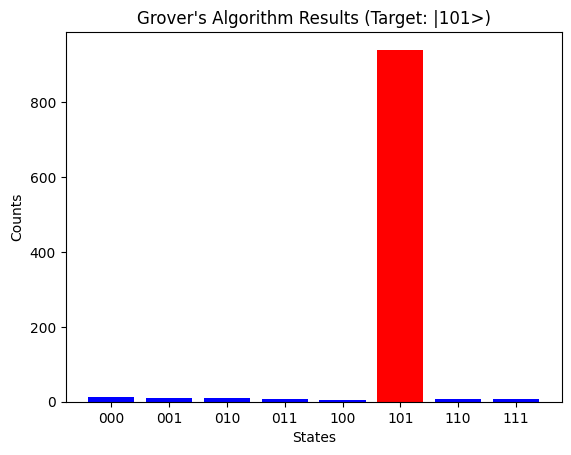

In [ ]:

import cirq
import numpy as np
import matplotlib.pyplot as plt


def grover_3_qubit(target_binary):
    qubits = [cirq.GridQubit(0, i) for i in range(3)]
    circuit = cirq.Circuit()

    circuit.append(cirq.H.on_each(*qubits))

    N = 2 ** 3
    iterations = int(np.floor(np.pi / 4 * np.sqrt(N)))

    for iteration in range(iterations):
        apply_oracle(circuit, qubits, target_binary)

        apply_diffusion(circuit, qubits)

    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits


def apply_oracle(circuit, qubits, target_binary):
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))

    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[-1]))

    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))


def apply_diffusion(circuit, qubits):
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))


def analyze_results(counts, target):
    total = sum(counts.values())
    success = counts.get(int(target, 2), 0)
    success_rate = success / total * 100

    print(f"Measurement results for target |{target}>:")
    for state in range(8):
        bitstr = format(state, '03b')
        count = counts.get(state, 0)
        pct = count / total * 100
        marker = "<-- Target" if bitstr == target else ""
        print(f"State |{bitstr}>: {count} times ({pct:.2f}%) {marker}")

    print(f"\nSuccess rate: {success_rate:.2f}% (optimal ~94% after 2 iterations)")

    states = [format(i, '03b') for i in range(8)]
    values = [counts.get(i, 0) for i in range(8)]
    colors = ['red' if s == target else 'blue' for s in states]

    plt.bar(states, values, color=colors)
    plt.title(f"Grover's Algorithm Results (Target: |{target}>)")
    plt.xlabel("States")
    plt.ylabel("Counts")
    plt.show()


if __name__ == "__main__":
    target = "101"
    circuit, qubits = grover_3_qubit(target)
    print("Circuit diagram:")
    print(circuit)

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    counts = result.histogram(key='result')
    analyze_results(counts, target)


**4 Result**

The successful implementation of Grover's algorithm for a 3-qubit database validates the
theoretical foundations of quantum search algorithms and provides a practical demonstration of
quantum computing potential for solving problems more efficiently than classical computers.